S0.data download

In [1]:
# import libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# extract genomic coords from gtf file
# chr1:16854-17055:-
gtf_file = '/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/annotation/gencode.v39.GRCh38.exons.gtf'
gtex_gtf = pd.read_csv(gtf_file, sep='\t', header = None)
gtex_gtf.columns = ['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']


In [3]:
gtex_gtf['coord_id'] = gtex_gtf['chr'] + ':' + gtex_gtf['start'].astype(str) + '-' + gtex_gtf['end'].astype(str) + ':' + gtex_gtf['strand']

In [4]:
gtex_gtf['exon_id'] = gtex_gtf['attribute'].str.extract(r'exon_id "(.*?);')
gtex_gtf.set_index('coord_id', inplace=True)


In [5]:
gtex_gtf['exon_len_kb'] = (gtex_gtf['end'] - gtex_gtf['start']+1)/1000

In [6]:
gtex_gtf.to_pickle('/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/annotation/gtex_gtf.pkl')

In [7]:
# read dataframe of GTEx exon read counts.
gtex_exon = pd.read_parquet('/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/GTEx_Analysis_v10_RNASeQCv2.4.2_exon_reads.parquet')
gtex_exon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350966 entries, ENSG00000223972.5_1 to ENSG00000210196.2_1
Columns: 19789 entries, Description to GTEX-ZZPU-2726-SM-5NQ8O
dtypes: float32(19788), object(1)
memory usage: 25.9+ GB


In [8]:
del gtex_exon['Description']

In [9]:
gtex_exon.index = gtex_gtf.index

In [ ]:
def reads_normalization

In [15]:
gtex_exon['exon_len_kb'] = gtex_gtf['exon_len_kb'].to_list()

In [10]:
# Calculate total reads for each sample
total_reads = gtex_exon.sum()

In [24]:
total_reads

GTEX-1117F-0005-SM-HL9SH         4.185702e+07
GTEX-1117F-0011-R10b-SM-GI4VE    5.116822e+07
GTEX-1117F-0011-R11b-SM-GIN8R    6.668968e+07
GTEX-1117F-0011-R2b-SM-GI4VL     7.555794e+07
GTEX-1117F-0011-R3a-SM-GJ3PJ     6.682748e+07
                                     ...     
GTEX-ZZPU-2426-SM-5E44I          6.321222e+07
GTEX-ZZPU-2526-SM-GOQZ3          7.963766e+07
GTEX-ZZPU-2626-SM-5E45Y          6.477201e+07
GTEX-ZZPU-2726-SM-5NQ8O          5.832903e+07
exon_len_kb                      1.340228e+05
Length: 19789, dtype: float64

In [12]:
gtex_exon_cpm = pd.DataFrame()
gtex_exon_cpm.index = gtex_exon.index

In [ ]:
# Calculate RPKM for each sample
for sample in total_reads.index:
    gtex_exon_rpkm[sample] = (gtex_exon[sample] * 1e9) / (total_reads[sample] * gtex_exon['exon_len_kb'])

In [13]:
# Calculate RPKM for each sample
for sample in total_reads.index:
    gtex_exon_cpm[sample] = (gtex_exon[sample] * 1e6) / total_reads[sample]

/tmp/ipykernel_27079/530691485.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gtex_exon_cpm[sample] = (gtex_exon[sample] * 1e6) / total_reads[sample]
/tmp/ipykernel_27079/530691485.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gtex_exon_cpm[sample] = (gtex_exon[sample] * 1e6) / total_reads[sample]
/tmp/ipykernel_27079/530691485.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

In [14]:
del gtex_exon

In [23]:
gtex_exon_rpkm.to_pickle('./GTEx/GTEx_Analysis_v10_RNASeQCv2.4.2_exon_RPKM.pkl')

In [15]:
gtex_exon_cpm.to_pickle('./GTEx/GTEx_Analysis_v10_RNASeQCv2.4.2_exon_cpm.pkl')

In [16]:
# get GTEx sample meta data 
meta_file = '/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/meta/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt'
gtex_meta = pd.read_csv(meta_file, sep = '\t') 

/tmp/ipykernel_27079/2413290016.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  gtex_meta = pd.read_csv(meta_file, sep = '\t')


In [17]:
gtex_meta.set_index('SAMPID', inplace=True)

S1. format expr matrix

In [18]:
import pandas as pd
import subprocess

# function to exact Exon expression matrix from raw data table
def get_expr_matrix(file_path, data_types):
    col_idx = []
    raw_expr = pd.read_csv(file_path, sep='\t', skiprows=[1], index_col="Hybridization REF")
    if data_types == 'raw_reads':
        col_idx = list(range(0,len(raw_expr.columns),3))
    elif data_types == 'median_length_normalize':
        col_idx = list(range(1,len(raw_expr.columns),3))
    elif data_types == 'RPKM':
        col_idx = list(range(2,len(raw_expr.columns),3))
    else:
        raise Exception("Sorry, wrong data types")
    sub_expr = raw_expr.iloc[:,col_idx]
    # strip column labels
    if data_types == 'median_length_normalize':
        sub_expr.columns = sub_expr.columns.str.rstrip('.1')
    elif data_types == 'RPKM':
        sub_expr.columns = sub_expr.columns.str.rstrip('.2')
    return sub_expr


def get_exon_bed(expr_matrix, cancer_type, outpath):
    out_file = os.path.join(outpath, cancer_type+'_exon.bed')
    expr_bed = open(out_file, 'w')
    for i in expr_matrix.index:
        chr = i.split(':')[0]
        if '_rCRS' in chr:
            chr = chr.rstrip('_rCRS')
        coords = i.split(':')[1].split('-')
        start = int(coords[0])
        end = int(coords[1])
        strand = i.split(':')[2]
        # print(i)
        expr_bed.write(f"{chr}\t{start}\t{end}\t{i}\t{cancer_type}\t{strand}\n")
    expr_bed.close()
    return out_file

def get_SEP_expr(exon_intersection_path, expr_matrix, SEP_IDs, outpath):
    if os.path.exists(exon_intersection_path):
        exon_overlap = pd.read_csv(exon_intersection_path, sep='\t', header=None)
        exon_expr = expr_matrix.loc[exon_overlap[9].to_list()]
        exon_expr['ID'] = exon_overlap[3].to_list()
        SEP_expr = exon_expr.groupby('ID').sum()
        SEP_with_exons = SEP_expr.index.to_list()
        for sep in SEP_IDs:
            if sep not in SEP_with_exons:
                SEP_expr.loc[sep] = [0] * len(SEP_expr.columns)
        SEP_expr_st = SEP_expr.sort_index()
        SEP_expr_st.to_csv(outpath, sep='\t')
        return SEP_expr_st

def intersect_bed_files(cancer_bed, sep_bed, intersect_bed):
    cmd = f'bedtools intersect -a {sep_bed} -b {cancer_bed} -wa -wb -s'
    result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    with open(intersect_bed, 'w') as file: 
        file.write(result.stdout)
    file.close()
    



In [19]:

sep_bed_path = '/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/bed/candis.bed'
bed_path='/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/bed'
expr_out = './SEP_exon_expr' 


sep_df = pd.read_csv(sep_bed_path, sep='\t', header = None)
sep_ls = sep_df.loc[:,3].to_list()
print(sep_ls)

['IP_661448', 'IP_080226', 'IP_688853', 'IP_722311', 'II_710341', 'IP_635221', 'IP_755087', 'IP_190092', 'IP_288216', 'IP_600934', 'IP_081904', 'IP_665954', 'IP_167118', 'SEP119', 'ASDURF', 'DWORF', 'NBDY']


In [30]:
expr_matrix_bed = get_exon_bed(gtex_exon_rpkm, "GTEx", bed_path)

In [20]:
expr_matrix_bed = get_exon_bed(gtex_exon_cpm, "GTEx", bed_path)

In [21]:
print(expr_matrix_bed)
intersect_bed_path = os.path.join(bed_path, 'SEP_GTEx_ov.bed')
intersect_bed_path

/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/bed/GTEx_exon.bed


'/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/GTEx/bed/SEP_GTEx_ov.bed'

In [22]:

intersect_bed_files(expr_matrix_bed, sep_bed_path, intersect_bed_path)

In [23]:
if os.path.getsize(intersect_bed_path) != 0:
    sep_expr_out_path = os.path.join(expr_out, 'GTEx'+'_exon_cpm_expr.tsv')
    sep_expr = get_SEP_expr(intersect_bed_path, gtex_exon_cpm, sep_ls, sep_expr_out_path)
else:
    print('The no exon overlap with sep!')     

/tmp/ipykernel_27079/494348931.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exon_expr['ID'] = exon_overlap[3].to_list()


In [24]:
import pandas as pd
sep_expr = pd.read_csv('./SEP_exon_expr/GTEx_exon_cpm_expr.tsv', sep='\t', index_col = 'ID')

In [25]:
sep_expr_t = sep_expr.T

In [3]:
sep_expr_t = sep_expr_t.drop(index='exon_len_kb')

In [26]:
sep_expr_t.head()

ID                             ASDURF     DWORF  II_710341  IP_080226  \
GTEX-1117F-0005-SM-HL9SH          0.0  0.000000   7.238928   0.501708   
GTEX-1117F-0011-R10b-SM-GI4VE     0.0  0.015686  11.726028   0.879452   
GTEX-1117F-0011-R11b-SM-GIN8R     0.0  0.014995   4.468458   3.793690   
GTEX-1117F-0011-R2b-SM-GI4VL      0.0  0.021438   5.466004   0.780858   
GTEX-1117F-0011-R3a-SM-GJ3PJ      0.0  0.000000   6.135200   1.242004   

ID                             IP_081904  IP_167118  IP_190092  IP_288216  \
GTEX-1117F-0005-SM-HL9SH        0.191127   0.597271    0.00000   0.023891   
GTEX-1117F-0011-R10b-SM-GI4VE   0.547215   3.185571    0.00000   0.019543   
GTEX-1117F-0011-R11b-SM-GIN8R   1.439503   1.199586    0.00000   0.374871   
GTEX-1117F-0011-R2b-SM-GI4VL    0.066174   1.482306    0.05294   0.132349   
GTEX-1117F-0011-R3a-SM-GJ3PJ    0.239422   0.718267    0.00000   0.239422   

ID                             IP_600934  IP_635221  IP_661448  IP_665954  \
GTEX-1117F-0005-SM-HL9SH        0.000000   0.000000   6.522203   0.000000   
GTEX-1117F-0011-R10b-SM-GI4VE   0.273607   0.039087   8.345023   0.078174   
GTEX-1117F-0011-R11b-SM-GIN8R   0.209928   0.000000  43.559963   0.539814   
GTEX-1117F-0011-R2b-SM-GI4VL    0.622039   0.026470   6.445385   0.026470   
GTEX-1117F-0011-R3a-SM-GJ3PJ    0.314242   0.059856   9.786393   0.059856   

ID                             IP_688853  IP_722311  IP_755087      NBDY  \
GTEX-1117F-0005-SM-HL9SH        0.238909   0.000000   0.000000  0.934887   
GTEX-1117F-0011-R10b-SM-GI4VE   1.968301   0.000000   0.039087  6.550320   
GTEX-1117F-0011-R11b-SM-GIN8R   2.181352   0.029990   0.000000  4.236913   
GTEX-1117F-0011-R2b-SM-GI4VL    1.607689   0.026470   0.000000  5.775812   
GTEX-1117F-0011-R3a-SM-GJ3PJ    1.885436   0.014964   0.119711  9.159983   

ID                                SEP119  
GTEX-1117F-0005-SM-HL9SH        2.711298  
GTEX-1117F-0011-R10b-SM-GI4VE  13.162281  
GTEX-1117F-0011-R11b-SM-GIN8R  39.206707  
GTEX-1117F-0011-R2b-SM-GI4VL    2.600393  
GTEX-1117F-0011-R3a-SM-GJ3PJ   10.547503

In [27]:
import numpy as np

sep_expr_log2 = np.log2(sep_expr_t + 1)

In [8]:
np.log2(3 + 1)

2.0

In [28]:
sep_expr_log2.head()

ID                             ASDURF     DWORF  II_710341  IP_080226  \
GTEX-1117F-0005-SM-HL9SH          0.0  0.000000   3.042457   0.586604   
GTEX-1117F-0011-R10b-SM-GI4VE     0.0  0.022455   3.669710   0.910312   
GTEX-1117F-0011-R11b-SM-GIN8R     0.0  0.021472   2.451134   2.261137   
GTEX-1117F-0011-R2b-SM-GI4VL      0.0  0.030602   2.692874   0.832572   
GTEX-1117F-0011-R3a-SM-GJ3PJ      0.0  0.000000   2.834954   1.164789   

ID                             IP_081904  IP_167118  IP_190092  IP_288216  \
GTEX-1117F-0005-SM-HL9SH        0.252327   0.675609   0.000000   0.034062   
GTEX-1117F-0011-R10b-SM-GI4VE   0.629673   2.065424   0.000000   0.027923   
GTEX-1117F-0011-R11b-SM-GIN8R   1.286587   1.137232   0.000000   0.459296   
GTEX-1117F-0011-R2b-SM-GI4VL    0.092443   1.311681   0.074423   0.179318   
GTEX-1117F-0011-R3a-SM-GJ3PJ    0.309668   0.780955   0.000000   0.309668   

ID                             IP_600934  IP_635221  IP_661448  IP_665954  \
GTEX-1117F-0005-SM-HL9SH        0.000000   0.000000   2.911155   0.000000   
GTEX-1117F-0011-R10b-SM-GI4VE   0.348921   0.055316   3.224198   0.108589   
GTEX-1117F-0011-R11b-SM-GIN8R   0.274921   0.000000   5.477676   0.622756   
GTEX-1117F-0011-R2b-SM-GI4VL    0.697809   0.037691   2.896346   0.037691   
GTEX-1117F-0011-R3a-SM-GJ3PJ    0.394231   0.083868   3.431141   0.083868   

ID                             IP_688853  IP_722311  IP_755087      NBDY  \
GTEX-1117F-0005-SM-HL9SH        0.309070   0.000000   0.000000  0.952249   
GTEX-1117F-0011-R10b-SM-GI4VE   1.569637   0.000000   0.055316  2.916538   
GTEX-1117F-0011-R11b-SM-GIN8R   1.669640   0.042630   0.000000  2.388717   
GTEX-1117F-0011-R2b-SM-GI4VL    1.382772   0.037691   0.000000  2.760394   
GTEX-1117F-0011-R3a-SM-GJ3PJ    1.528789   0.021428   0.163127  3.344826   

ID                               SEP119  
GTEX-1117F-0005-SM-HL9SH       1.891924  
GTEX-1117F-0011-R10b-SM-GI4VE  3.823982  
GTEX-1117F-0011-R11b-SM-GIN8R  5.329364  
GTEX-1117F-0011-R2b-SM-GI4VL   1.848154  
GTEX-1117F-0011-R3a-SM-GJ3PJ   3.529509

In [29]:
for i in sep_expr_log2.index:
    # print(i)
    sep_expr_log2.loc[i, 'Tissue'] = gtex_meta.loc[i, 'SMTS']

In [13]:
sep_expr_log2.loc[:,['SEP119', 'Tissue']].to_csv('./sep119_exon_expr_RPKM_GTEx.tsv', sep='\t')

In [8]:
gtex_meta.SMTS[:5]

SAMPID
BMS-X4LF-0126-SM-4JBHL          Thyroid
BMS-X4LF-0226-SM-4JBJ3     Blood Vessel
BMS-X4LF-0326-SM-4JBIR           Muscle
BMS-X4LF-0426-SM-4JBIS             Skin
BMS-X4LF-0526-SM-4JBHX    Adrenal Gland
Name: SMTS, dtype: object

S4.Visualization

In [31]:
sep_expr_log2.columns

Index(['ASDURF', 'DWORF', 'II_710341', 'IP_080226', 'IP_081904', 'IP_167118',
       'IP_190092', 'IP_288216', 'IP_600934', 'IP_635221', 'IP_661448',
       'IP_665954', 'IP_688853', 'IP_722311', 'IP_755087', 'NBDY', 'SEP119',
       'Tissue'],
      dtype='object', name='ID')

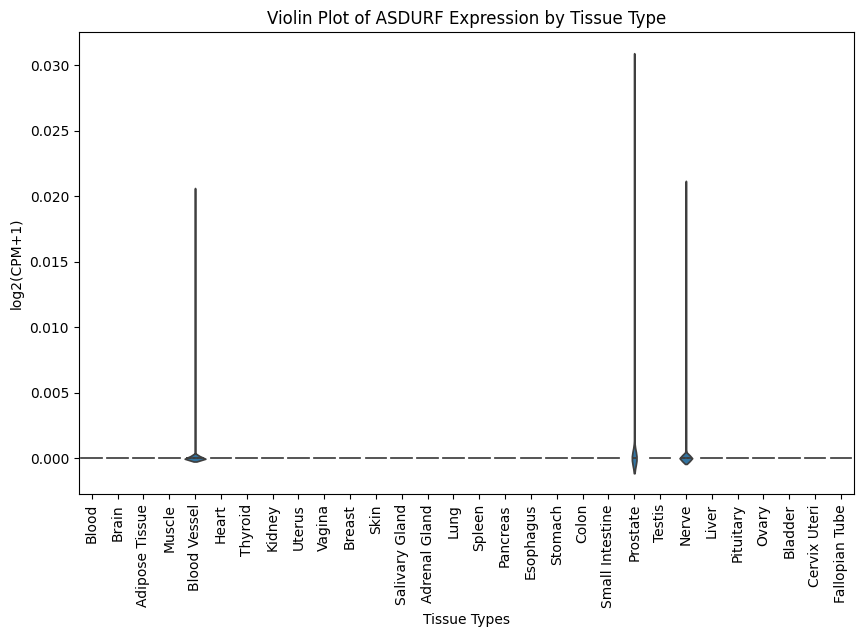

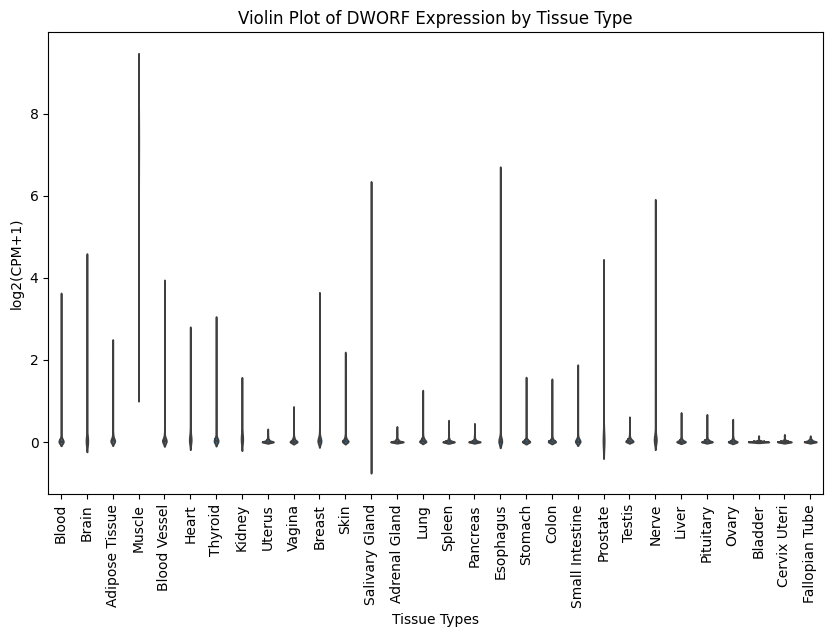

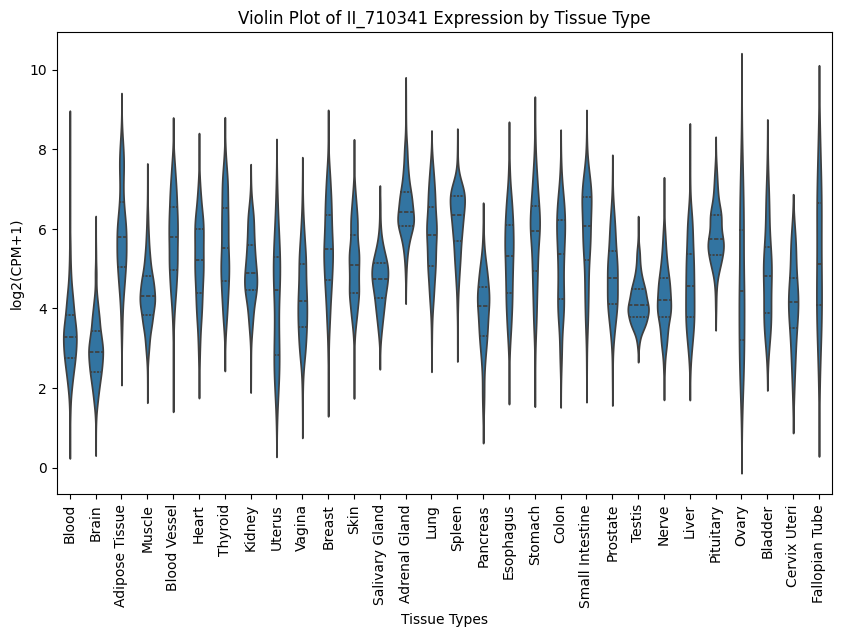

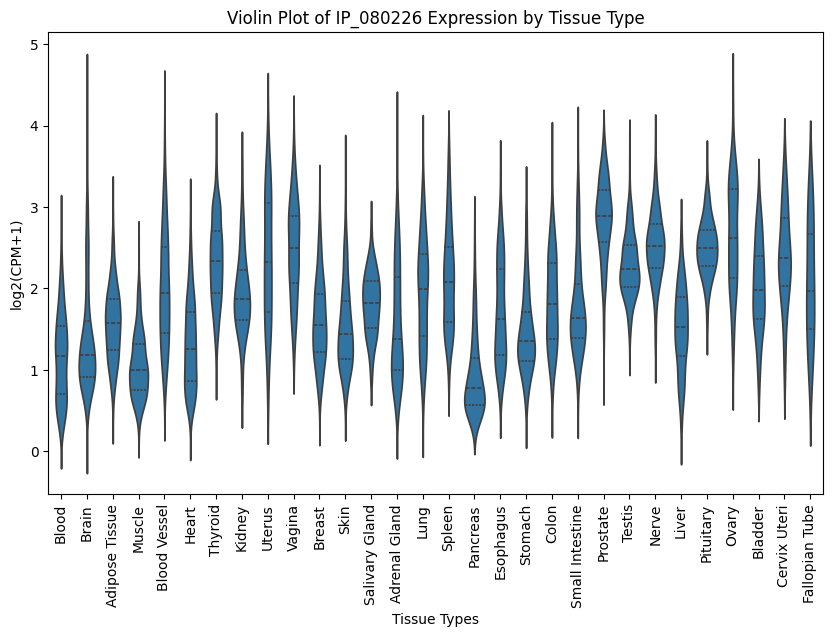

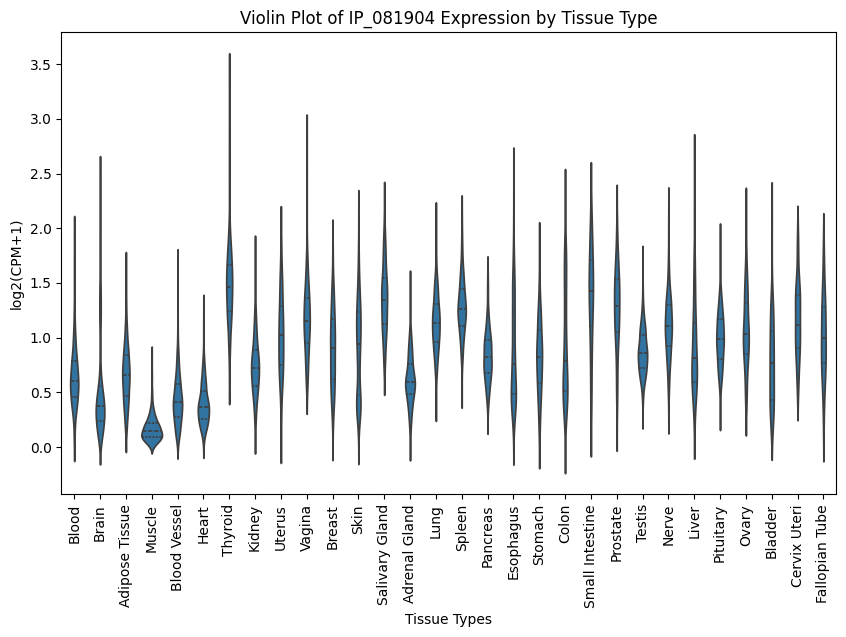

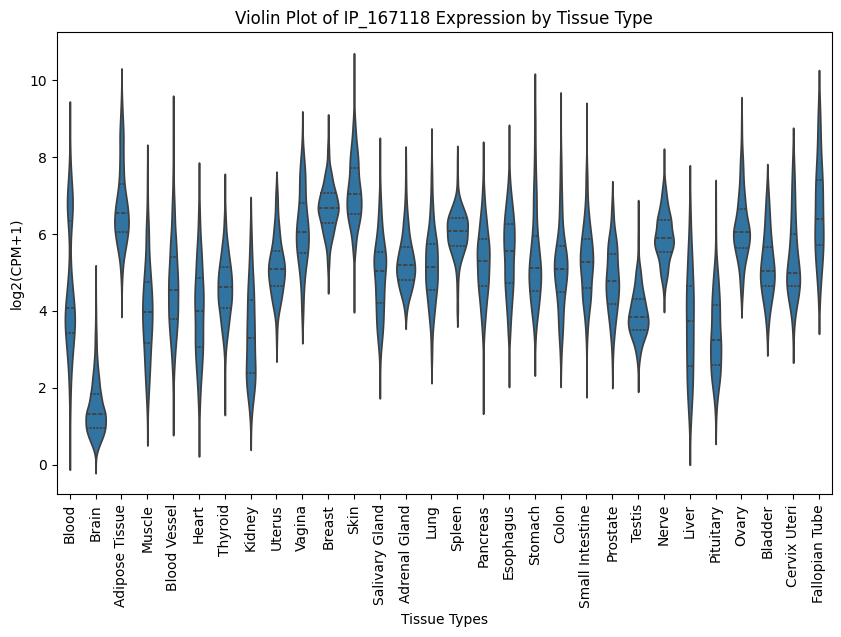

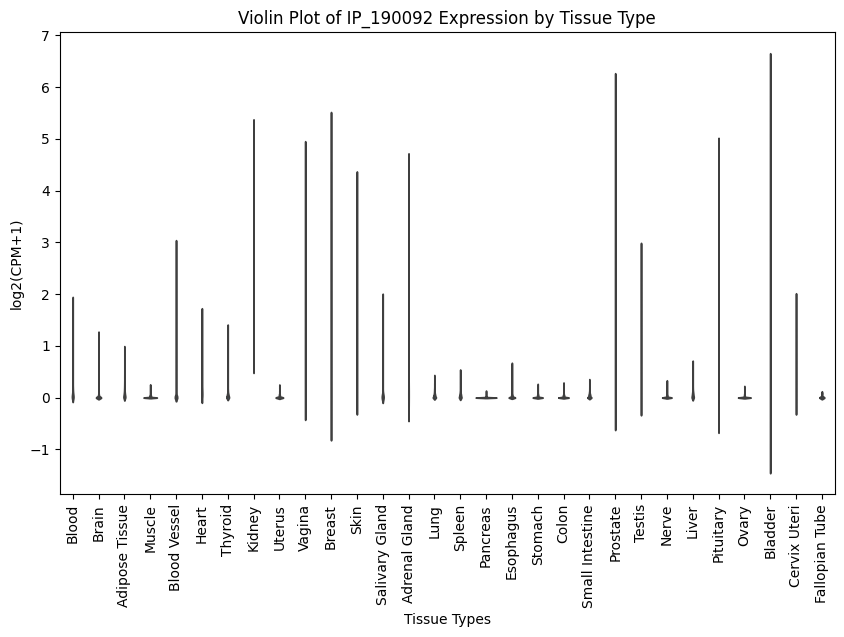

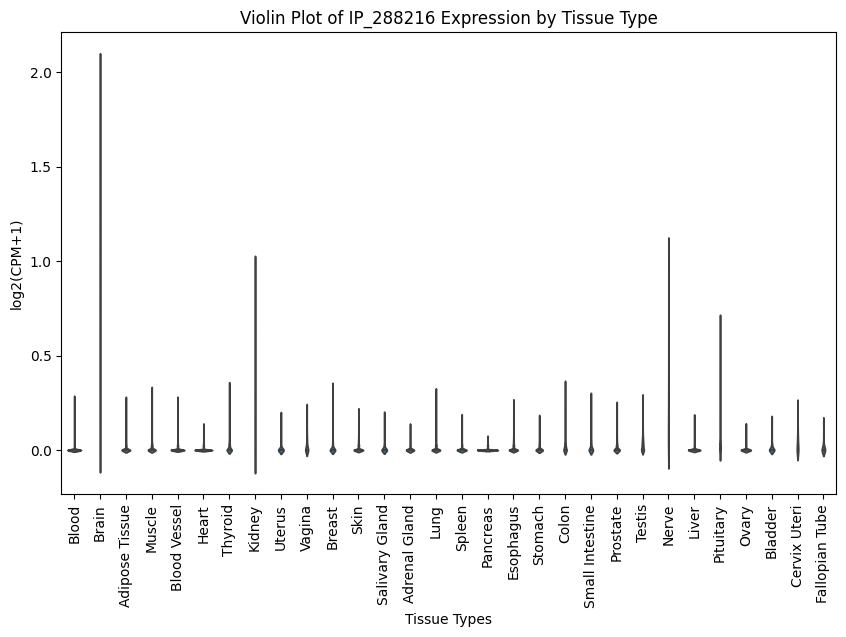

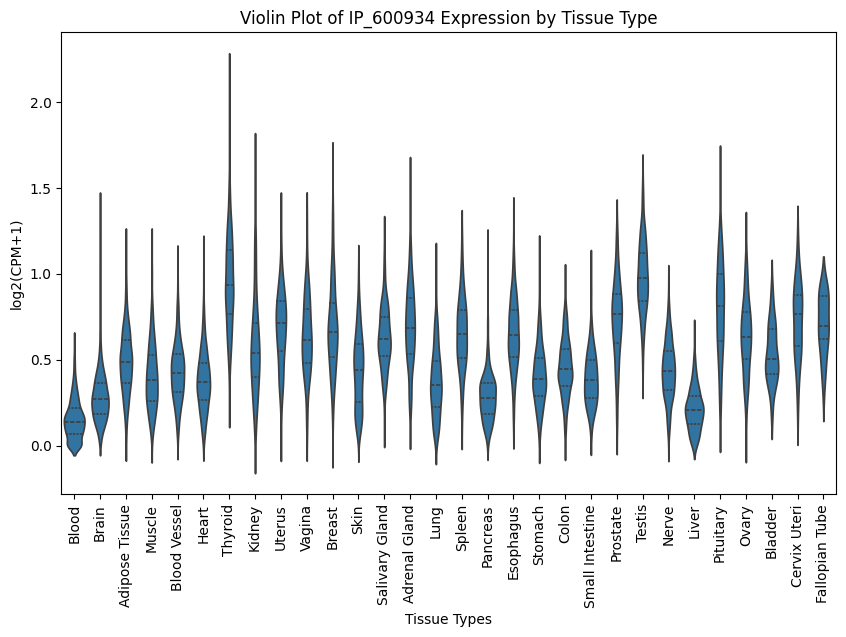

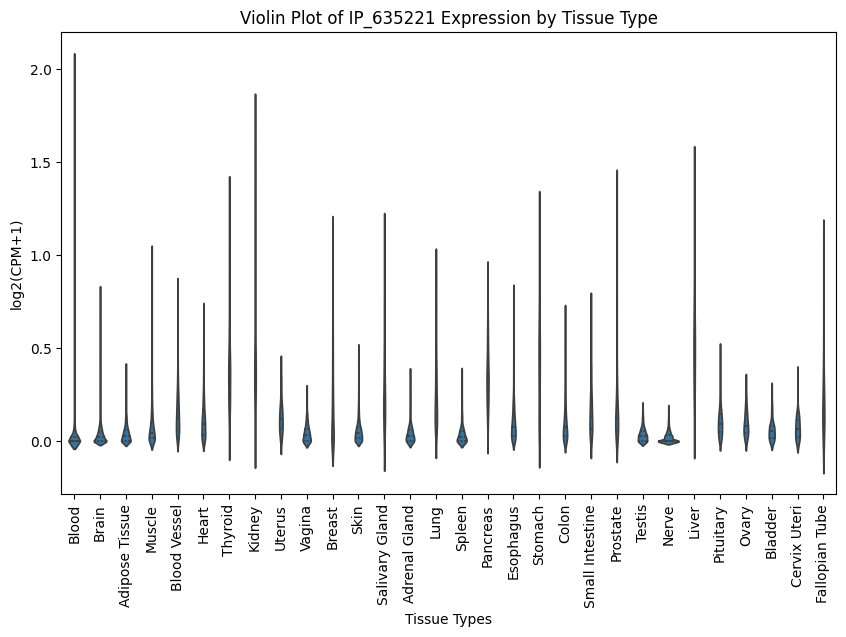

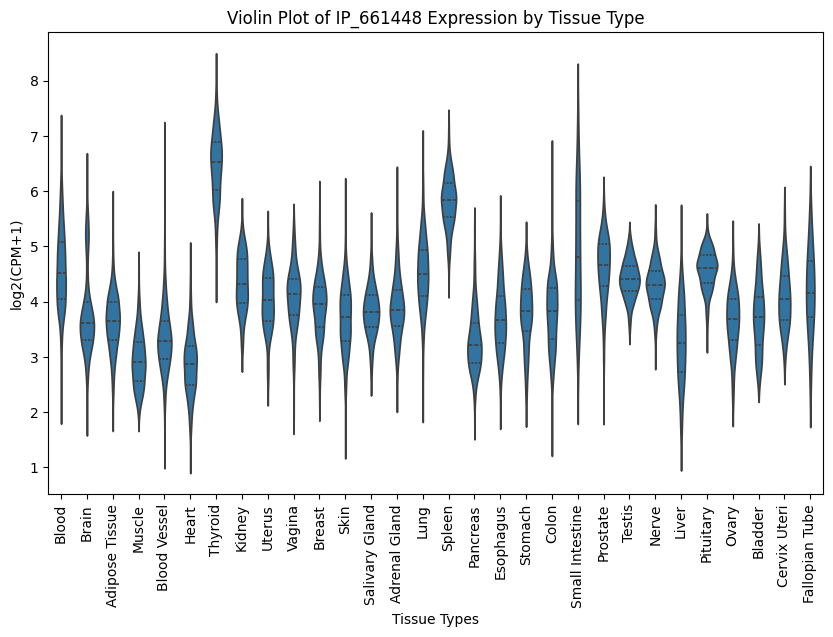

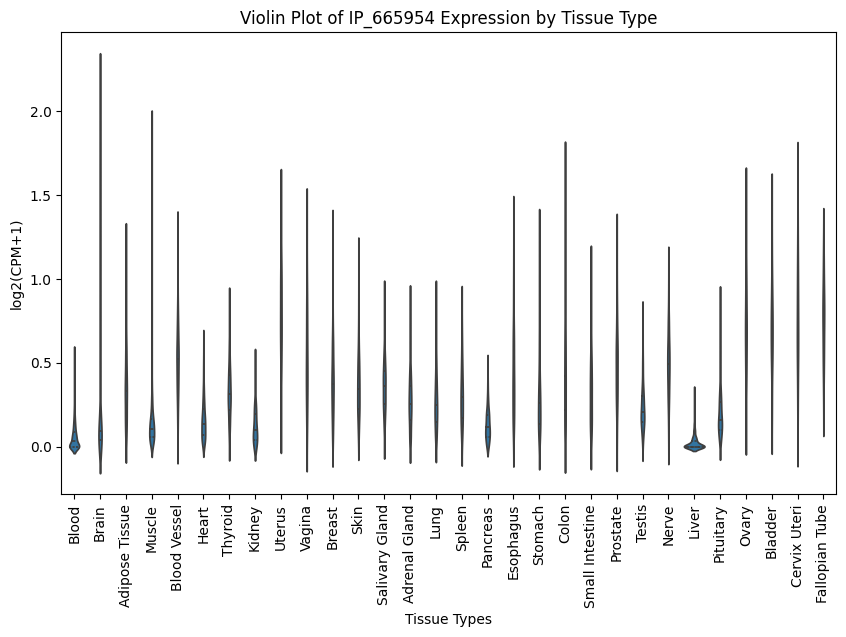

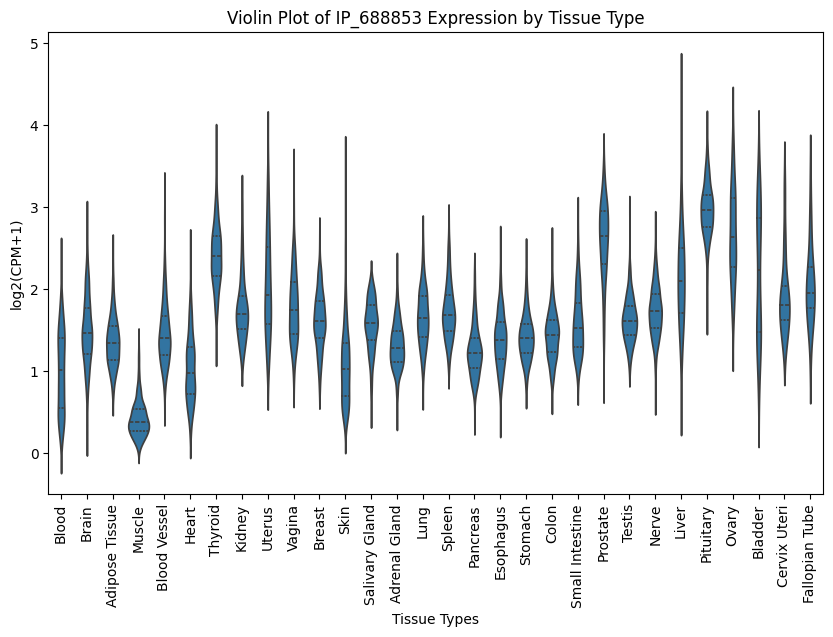

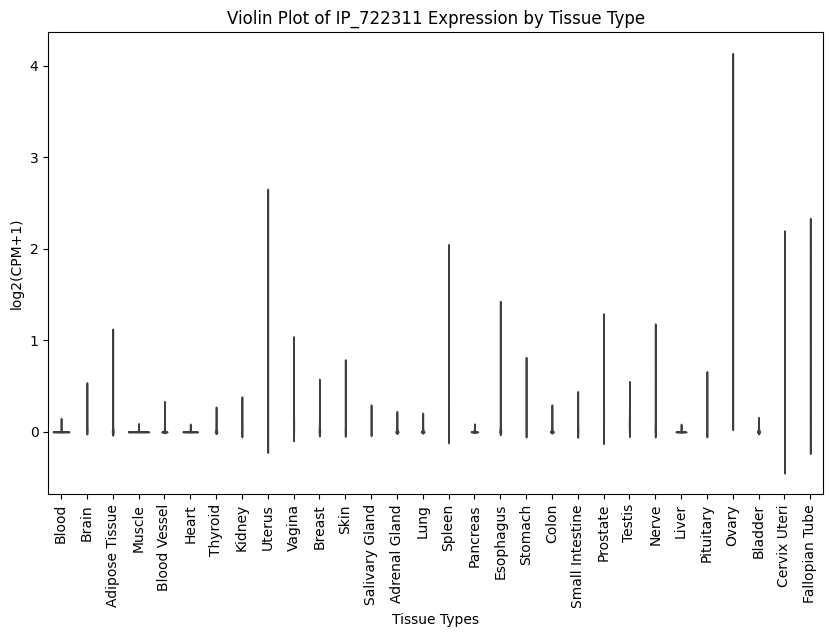

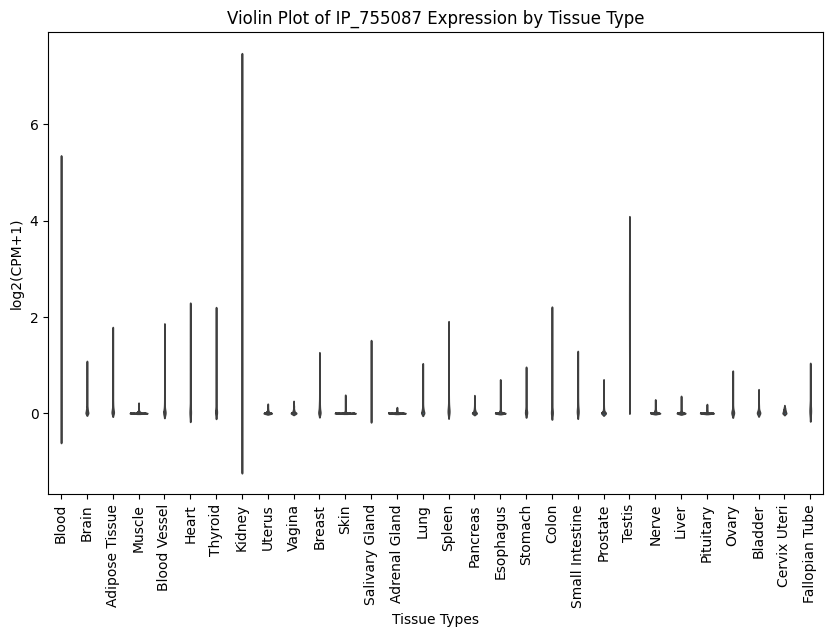

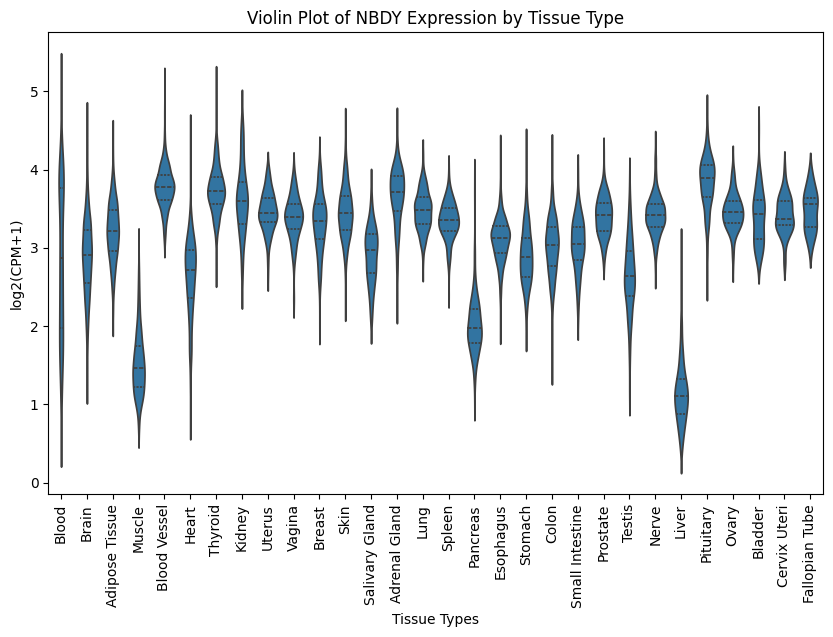

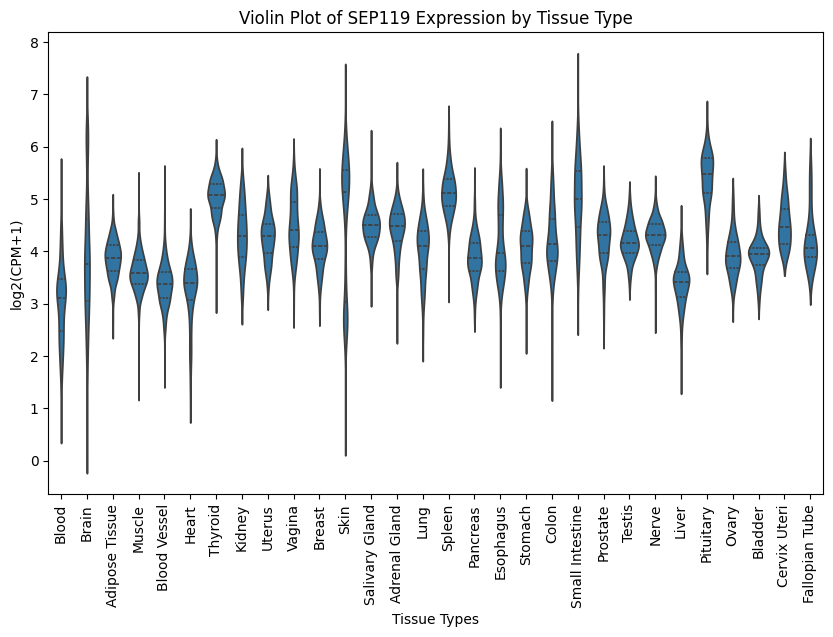

In [30]:

out_path = '/home/likecheng/projects/Cooperation/30_SEP_function_minning_20241104/s1_get_expression_matrixs/image_output_cpm'

sep_ls = sep_expr_log2.columns[:-1]
for sep in sep_ls:
    # Add titles and labels
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Tissue', y=sep, data=sep_expr_log2, inner="quart")

    # Add titles and labels
    plt.title(f'Violin Plot of {sep} Expression by Tissue Type')

    plt.xlabel('Tissue Types')
    plt.ylabel('log2(CPM+1)')
    plt.xticks(rotation=90)
    # plt.show()
    # Save the plot as a PNG file
    save_path = os.path.join(out_path, sep+'_GTEx.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save with 300 dpi